<a href="https://colab.research.google.com/github/drpetros11111/deep-learning-with-python-notebooks/blob/pp_study/02_DataRepr_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data representations for neural networks

In [1]:
# TensorFlow for Linear Algebra and Matrix Operations
import tensorflow as tf
from tensorflow.linalg import inv, det, eig, svd, norm, cholesky, solve, eye, diag
from tensorflow import matmul, reshape, transpose, reduce_sum

# Matplotlib for plotting
import matplotlib.pyplot as plt

# Optional: NumPy for array handling (if needed for some use cases)
import numpy as np


## Scalars (rank-0 tensors)

In [2]:
import numpy as np
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

## Vectors (rank-1 tensors)

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
x =np.array([12, 3, 6, 14, 7 ])
x
x.ndim


1

# Syntax of a function call
In the expression x = np.array([12, 3, 6, 14, 7]), both parentheses and brackets serve specific purposes:

------------------------------------
##Breakdown of the Syntax:
    np.array(...)

##Parentheses (...):

The function np.array() is called with its argument(s) inside parentheses.

In Python, parentheses are used to call functions and pass arguments to them.

Here, you are calling the array function from the numpy library (aliased as np), which converts a list (or other array-like structures) into a NumPy array.

     [12, 3, 6, 14, 7]:

##Brackets [...]:

The square brackets are used to create a list in Python. In this case, [12, 3, 6, 14, 7] is a list of integers.

This list is passed as an argument to the np.array() function, which converts it into a NumPy array.

------------------------------
#Summary
Function Call: The parentheses are necessary for calling the np.array function.

List Creation: The brackets are used to define the list of values that you want to convert into an array.

# Matrices (rank-2 tensors)

In [6]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim



2

In [7]:
x.shape

(3, 5)

In [8]:
y = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 99],
              [7, 77, 9, 88, 11]])
y.ndim

2

In [9]:
y.shape

(3, 5)

# Rank-3 and higher-rank tensors

# The gears of neural networks: tensor operations

# Element-wise operations

In [10]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

# Naive Relu
This function, naive_relu, is an implementation of the ReLU (Rectified Linear Unit) activation function, applied manually (or "naively") to a 2D array (matrix) x.

-------------------------------------
--------------------------------------
# Explanation of the Function

##Input Validation:
    assert len(x.shape) == 2


This assert statement checks that the input x is a 2D array (has exactly 2 dimensions).

If x doesn't have 2 dimensions, the function will raise an assertion error.

----------------------------------------

##Copying the Input:
    x = x.copy()

A copy of the input x is made to avoid modifying the original array (this is important for preserving the input when working with arrays in-place).

-------------------------------------
##Iterating Over the Array:

    for i in range(x.shape[0]):
       for j in range(x.shape[1]):
           x[i, j] = max(x[i, j], 0)

The function uses two nested loops to iterate over every element in the 2D array x.

x.shape[0] refers to the number of rows.

x.shape[1] refers to the number of columns.

For each element x[i, j], the ReLU operation is applied:
x[i, j] = max(x[i, j], 0) replaces each element with the maximum of the value itself or 0.

In other words, if the element is negative, it becomes 0 (ReLU operation).

------------------------
#Return the Result

    return x

The modified array x is returned as output after applying the ReLU operation to all its elements.

------------------------
#What is ReLU?
ReLU is a common activation function used in neural networks. It stands for Rectified Linear Unit.
Mathematically, ReLU is defined as:

$$ReLU(x)=max(0,x)$$

If the input is positive, it returns the input.

If the input is negative, it returns 0.

--------------------------------
#Example
If x is a 2x2 matrix:

    x = np.array([[1, -2], [-3, 4]])

The naive_relu(x) function will:

Loop through each element.

Apply the ReLU operation (replace negative values with 0).

-----------------------
#Return:
    array([[1, 0],
           [0, 4]])

----------------------------
#Summary
The naive_relu function manually implements the ReLU activation function for a 2D array using a nested loop.

It sets any negative values in the input matrix to 0 while keeping positive values unchanged.

This is a basic, non-optimized implementation, and libraries like TensorFlow or NumPy provide much more efficient ways to apply ReLU on large arrays.

Would you like to see a more optimized version?

In [11]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [12]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [13]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.03 s


# Benchmark Relu
This code snippet benchmarks how long it takes to perform a vectorized operation on two 2D NumPy arrays (matrices) 1,000 times.

-----------------------------
##Importing the time Module:

    import time

The time module is used to measure the time it takes to perform certain operations (in this case, to benchmark the speed of adding two arrays and applying the ReLU-like operation).

-----------------------------------
## Creating Random Arrays:

    x = np.random.random((20, 100))
    y = np.random.random((20, 100))

Two random arrays, x and y, are created using NumPy's random.random function.

Both arrays have the shape (20, 100), meaning they are 2D arrays with 20 rows and 100 columns.

Each element in x and y is a random float between 0 and 1.

-----------------------------
##Timing the Operation:

    t0 = time.time()

t0 stores the current time at the start of the benchmark using time.time().

-----------------------------------
##Performing the Operation 1,000 Times:

    for _ in range(1000):
       z = x + y
       z = np.maximum(z, 0.)

A loop runs 1,000 times. Inside the loop:
Addition: z = x + y adds the two arrays x and y element-wise.

The result, z, is the same shape as x and y.

--------------------------------
##ReLU Operation:
z = np.maximum(z, 0.) replaces all negative values in z with 0, which is similar to applying the ReLU activation function.

Since x and y are filled with random values between 0 and 1, the addition itself won't result in negative values, but this simulates how ReLU is typically applied.

------------------------------------
##Measuring the Total Time:

    print("Took: {0:.2f} s".format(time.time() - t0))

After the loop finishes, the total time taken is calculated by subtracting the initial time t0 from the current time using time.time().

The result is printed in seconds, formatted to 2 decimal places.

This code demonstrates the efficiency of vectorized operations in NumPy:

Addition of two arrays (x + y) and applying the ReLU-like operation (np.maximum(z, 0.)) are done in a vectorized manner, meaning the operations are performed on entire arrays at once without the need for explicit loops in Python.

NumPy's internal C and Fortran optimizations make such vectorized operations much faster than if we were to use explicit Python loops.

--------------------------------
##Example Output:
An example output might look like:

    Took: 0.05 s

This indicates that the operation took 0.05 seconds to complete 1,000 iterations.

--------------------------------
#Summary
The code adds two random arrays (x and y) 1,000 times and applies a ReLU-like function to the result.

It uses vectorized NumPy operations for efficient computation.
The time taken to complete the operation is measured and printed.

Would you like to optimize this further or add other operations to measure?

# Broadcasting

In [14]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [15]:
y = np.expand_dims(y, axis=0)

In [16]:
Y = np.concatenate([y] * 32, axis=0)

In [17]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

# Adding a vector to each row of a matrix
The function naive_add_matrix_and_vector is a manual implementation of adding a vector to each row of a matrix.

This is known as broadcasting in NumPy, and the function achieves it using nested loops.

In the provided naive_add_matrix_and_vector function, the variables x and y are not related to the common usage of x (input features) and y (labels) in machine learning contexts.

Instead, here:

x is a matrix (a 2D array), which could represent any data structured in rows and columns (for example, features or data points).

y is a vector (a 1D array), which could represent any set of values that need to be added to each row of the matrix x.

##Key Points:
The purpose of this function is to add the vector y to each row of the matrix x.

This operation is commonly known as broadcasting in NumPy, and in neural networks, such an operation could resemble adding bias terms to every data point in a batch (though y is not strictly a bias here).

There is no notion of "labels" involved in this function. The y in this context is simply a vector being added to the matrix.

##Clarification of Usage:
If x were features (e.g., pixel intensities of an image or sensor measurements), the vector y could represent a set of corrections, biases, or a transformation you want to apply to each feature across multiple data points (rows).

In the context of neural networks or matrix operations, these names don't correspond to input (x) and target labels (y).

They are just generic names for matrix and vector data being added element-wise.

##In Terms of ReLU:
If you were referring to the earlier use of ReLU, the operation here doesn’t directly involve the ReLU function.

It is merely adding a vector y to each row of a matrix x. The ReLU function, on the other hand, sets negative values to zero.

If the function were used in the context of neural networks, x might be an activation matrix from a layer of a neural network, and adding a vector y could represent adding bias terms to the activations before applying the ReLU operation.

Would you like to clarify how this fits into the broader context you're working with, like neural networks or matrix manipulations?

--------------------------
## Assertions:

    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]


These assertions check that:

x is a 2D array (matrix).

y is a 1D array (vector).

The number of columns in x (x.shape[1]) matches the number of elements in y (y.shape[0]), ensuring that the vector can be added to each row of the matrix.

--------------------------------
##Copying the Input Matrix:

    x = x.copy()

This creates a copy of the matrix x so that the original matrix is not modified directly.

##Nested Loops to Add Vector to Matrix:

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]

The outer loop for i in range(x.shape[0]) iterates over the rows of the matrix x (the number of rows is x.shape[0]).

The inner loop for j in range(x.shape[1]) iterates over the columns of the matrix x (the number of columns is x.shape[1]).

Inside the inner loop, the function adds the corresponding element from the vector y to the element in the matrix x.

Specifically, for each row i and column j, the value x[i, j] is incremented by y[j].

-------------------------------------
#Return the Modified Matrix:

    return x

After applying the vector to each row of the matrix, the function returns the modified matrix x.

--------------------
#Example:
Suppose x is a 2x3 matrix:

    x = np.array([[1, 2, 3],
                  [4, 5, 6]])

And y is a 1D vector of length 3:

    y = np.array([10, 20, 30])

Calling naive_add_matrix_and_vector(x, y) will result in:

First, the vector [10, 20, 30] is added to the first row: [1 + 10, 2 + 20, 3 + 30] = [11, 22, 33].

Then, the vector is added to the second row: [4 + 10, 5 + 20, 6 + 30] = [14, 25, 36].

The output will be:

    array([[11, 22, 33],
           [14, 25, 36]])

------------------------------
#Broadcasting in NumPy
In NumPy, this operation is known as broadcasting, where NumPy automatically adds the vector to each row of the matrix without explicit loops.

You can achieve the same operation more efficiently with NumPy like this:

    z = x + y

This automatically applies the vector y to each row of x, thanks to NumPy's broadcasting rules.

--------------------------
#Summary
The function naive_add_matrix_and_vector manually adds a vector to each row of a matrix using nested loops.

It checks for valid input shapes and then performs the addition element-wise.

This operation can be more efficiently performed in NumPy using broadcasting (x + y).

In [18]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

# Broadcasting Example 2
This snippet demonstrates an example of broadcasting in NumPy, where operations between arrays of different shapes are performed without explicit looping.

--------------------------
Let’s break down each part of the code to understand how it works.

##Creating Random Arrays:

    x = np.random.random((64, 3, 32, 10))

##x is a 4D array with shape (64, 3, 32, 10).

This means that x contains 64 samples, each with 3 channels (or features), where each channel has a matrix of shape (32, 10).

The values in x are random floats between 0 and 1.

    y = np.random.random((32, 10))

y is a 2D array with shape (32, 10).

This is a matrix with 32 rows and 10 columns, filled with random floats between 0 and 1.

------------------------
#Applying the np.maximum Function:

    z = np.maximum(x, y)

np.maximum performs an element-wise maximum between the arrays x and y.

For each element in x and y, it compares the values and returns the larger of the two.

This works due to broadcasting in NumPy.

----------------------
#Broadcasting Explained:
Broadcasting in NumPy allows arrays of different shapes to be used in arithmetic operations as long as the shapes are compatible.

NumPy tries to expand smaller arrays along dimensions to match the larger array’s shape.

---------------------------
#Broadcasting Rules:
Align the shapes of the arrays starting from the rightmost dimension.

---------------------------
#If dimensions are not equal:
A dimension of size 1 can be stretched to match the larger dimension.

Dimensions that are not 1 and don’t match will result in an error.

--------------------------
#Shape Alignment:
    x has shape (64, 3, 32, 10).
    y has shape (32, 10).

To align these shapes:

The rightmost two dimensions of x and y both have the shape (32, 10), so they are directly compatible for element-wise comparison.

NumPy automatically broadcasts y across the first two dimensions of x.

This means y is virtually "expanded" to match the first two dimensions of x, replicating the data in y for each sample and channel in x.

In this case, y is repeated 64 times (for the first dimension) and 3 times (for the second dimension).

--------------------------
#Final Shape:
The resulting array z will have the same shape as x, which is (64, 3, 32, 10), since the maximum operation is applied element-wise across the broadcasted arrays.

--------------------
#Example of the Operation:
Suppose an element in x at position (0, 0, 0, 0) is 0.5, and the corresponding element in y at position (0, 0) is 0.7.

The np.maximum function will compare these two values and choose the larger one, so in this case, z[0, 0, 0, 0] will be 0.7.

##Key Points:
x is a 4D array, and y is a 2D array.

Due to broadcasting, y is replicated across the first two dimensions of x to match the shapes, and then an element-wise maximum is computed.

The result z has the same shape as x.

--------------------
#Summary
x is a 4D tensor, and y is a 2D tensor.

Broadcasting allows NumPy to perform an element-wise maximum operation between x and y by aligning their shapes.

The resulting tensor z has the shape (64, 3, 32, 10).

# Tensor product

In [19]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [20]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

# Dot product
The function naive_vector_dot implements a dot product (or inner product) between two vectors x and y manually, using a loop.

This is a fundamental operation in linear algebra, particularly in machine learning, where it is often used in tasks such as computing the weighted sum of features in neural networks.

----------------------
Assertions:

    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

These checks ensure:

x is a 1D vector (it has one dimension).

y is a 1D vector.

Both vectors have the same length (the number of elements in x and y must match for the dot product to be valid).

------------------------------
Initialize the Dot Product:

    z = 0

The result of the dot product will be stored in z, which starts at 0.

-------------------------
#Loop Through the Elements of x and y:

    for i in range(x.shape[0]):
       z += x[i] * y[i]

The loop iterates over each element in the vectors. x.shape[0] gives the length of the vectors.

For each element i, it multiplies the corresponding elements from x and y (x[i] * y[i]), and adds the result to z.

-------------------------------
#Return the Dot Product:
    return z

After the loop finishes, the function returns z, which now holds the sum of all element-wise products of x and y.

-------------------------
#Example
Suppose we have two vectors:

    x = np.array([1, 2, 3])
    y = np.array([4, 5, 6])

The dot product is calculated as:

    1*4 + 2*5 + 3*6 = 4 + 10 + 18 = 32

So, naive_vector_dot(x, y) would return 32.

-----------------------------
#Explanation of the Dot Product:
The dot product of two vectors is the sum of the products of their corresponding elements. Mathematically, for two vectors    
    x = [x1, x2, ..., xn] and y = [y1, y2, ..., yn]
    
the dot product is:

    x · y = x1*y1 + x2*y2 + ... + xn*yn

---------------------------
##In NumPy

You could achieve the same operation more efficiently in NumPy using:

    z = np.dot(x, y)

This function does the same thing but is much faster because it's optimized for performance.

-------------------------------
#Summary
This function calculates the dot product between two 1D vectors manually, using a loop.

It checks that the vectors are of the same length and returns the sum of the element-wise products.

The dot product is a key operation in many machine learning algorithms, such as computing the weighted sum of features or activations in neural networks.

In [21]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

# Naive_matrix_vector_dot multiplication
The function naive_matrix_vector_dot performs the matrix-vector multiplication between a matrix x and a vector y.

This operation is fundamental in linear algebra and is widely used in machine learning tasks like computing the activations in a neural network layer.

-------------------------------
##Assertions:

    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]

These checks ensure:

x is a 2D matrix (it has two dimensions, i.e., rows and columns).

y is a 1D vector.

The number of columns in the matrix x (i.e., x.shape[1]) must match the number of elements in the vector y (i.e., y.shape[0]).

This is necessary for matrix-vector multiplication to be valid.

-----------------------------
#Initialize the Result Vector:

    z = np.zeros(x.shape[0])

z is initialized as a vector of zeros with the same length as the number of rows in x (i.e., x.shape[0]).

This will hold the result of the matrix-vector multiplication.
Loop Through the Rows and Columns:

    for i in range(x.shape[0]):
       for j in range(x.shape[1]):
          z[i] += x[i, j] * y[j]

The outer loop iterates over the rows of x (i runs over x.shape[0]).

The inner loop iterates over the columns of x (j runs over x.shape[1]).

For each element in row i of matrix x, it multiplies x[i, j] (the element at row i, column j) with y[j] (the corresponding element in vector y) and adds the result to z[i].

Essentially, this is calculating the dot product between row i of matrix x and vector y.

--------------------------
#Return the Result:

    return z

After all the rows and columns have been processed, the function returns the result vector z, which contains the matrix-vector product.

-----------------------
#Example
Let's consider an example with a matrix x and a vector y:

    x = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
    y = np.array([1, 2, 3])               # Shape: (3,)

Matrix x has 2 rows and 3 columns, and vector y has 3 elements.

The function computes the dot product between each row of x and y:

For the first row of x ([1, 2, 3]) and y ([1, 2, 3]):

    1*1 + 2*2 + 3*3 = 1 + 4 + 9 = 14

For the second row of x ([4, 5, 6]) and y ([1, 2, 3]):

    4*1 + 5*2 + 6*3 = 4 + 10 + 18 = 32


##So, the result vector z will be:

    z = np.array([14, 32])  # Shape: (2,)

------------------------------
#Matrix-Vector Multiplication:
Matrix-vector multiplication is a key operation where, given a matrix x of shape (m, n) and a vector y of shape (n,), the result is a vector z of shape (m,).

Each element of z is the dot product of the corresponding row of x with the vector y.

#In NumPy:
You could achieve the same operation more efficiently using:

    z = np.dot(x, y)

This performs matrix-vector multiplication in a highly optimized manner.

-----------------------
#Summary
The function naive_matrix_vector_dot multiplies a matrix x (2D) by a vector y (1D) manually, using nested loops.

It computes the dot product of each row in the matrix with the vector and stores the result in a new vector z.

Matrix-vector multiplication is crucial in various linear algebra and machine learning tasks.

In [22]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [23]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# Tensor reshaping

In [24]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
train_images = train_images.reshape((60000, 28 * 28))

In [26]:
x=np.array([[0., 1.],
            [2., 3.],
            [4., 5.0]])
x.shape

(3, 2)

In [27]:
x = x.reshape(6, 1)
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

# Matrices (rank-2 tensors)

In [28]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [29]:
x= np.array([[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]])
x.ndim

2

# Rank-3 and higher-rank tensors

In [30]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

# Key attributes

In [31]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [32]:
train_images.ndim

3

In [33]:
train_labels.ndim

1

In [34]:
train_images.dtype

dtype('uint8')

# Displaying the fourth digit

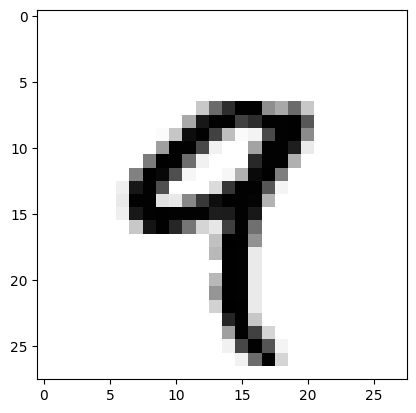

In [35]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

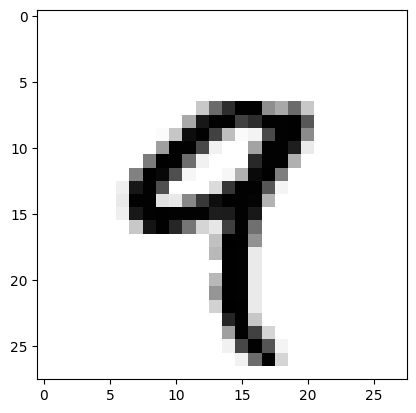

In [36]:
import matplotlib.pyplot as plt

# Changing 'train_image' to 'train_images' assuming this is the intended variable
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# Slicing

In [37]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In this line of code:

    my_slice = train_images[10:100, :, :]

you are slicing the train_images array and retrieving a subset of the data. Here's a detailed breakdown:

#train_images[10:100]:

This selects rows (or images) from index 10 to index 99 (since Python slicing is exclusive of the end index).

#:
This selects all pixels along the second dimension (height) of the images.

#:
This selects all pixels along the third dimension (width) of the images.

The result, my_slice, will contain the images from index 10 to 99, and the shape of the sliced tensor is determined by the number of images and their height and width.

For example, if train_images has a shape of (60000, 28, 28)—meaning 60,000 images of 28x28 pixels—then:

train_images[10:100, :, :] will select 90 images (from index 10 to 99).

The shape of my_slice will be (90, 28, 28).

So, when you run my_slice.shape, it will output:

    (90, 28, 28)
    
This indicates that you now have a subset of 90 images, each of size 28x28 pixels.

# The notion of data batches

In [38]:
batch = train_images[:128]

In the following code:

    batch = train_images[:128]

you are selecting a batch of images from the train_images dataset. Here’s what is happening:

#train_images[:128]
selects the first 128 images from the train_images array.

The slice :128 takes images from index 0 to 127 (since slicing is exclusive of the end index).

This is typically done when working with mini-batches in machine learning, where instead of processing all the images at once, you process a smaller batch at a time (for memory and computational efficiency).

If, for example, train_images has the shape (60000, 28, 28), representing 60,000 images of 28x28 pixels, then:

train_images[:128] will select the first 128 images, giving batch a shape of (128, 28, 28).

-----------------
#In summary:

batch now contains 128 images.

Each image is 28x28 pixels if you are using the MNIST dataset (or similar datasets).

This subset can be used for training or evaluation in small, manageable chunks.

In [39]:
batch = train_images[128:256]

In [40]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In this code snippet:
    n = 3
    batch = train_images[128 * n:128 * (n + 1)]

you are selecting a batch of images from the train_images dataset, starting from the index 128 * n and going up to 128 * (n + 1) (not inclusive of 128 * (n + 1)).

----------------------
Here’s the breakdown:

#n = 3:

This sets n to 3, which will be used to calculate the starting and ending indices for slicing.

#128 * n and 128 * (n + 1):

These are the start and end indices for slicing the batch.

#128 * 3 = 384:

The start index for this batch.

#128 * (3 + 1) = 512:

The end index for this batch (not inclusive).

So, this code is selecting the images from index 384 to 511, i.e., the fourth batch of 128 images (since n = 3 means you’re selecting the batch starting from the 384th image).

If train_images has a shape of (60000, 28, 28) (for example), then:

batch will contain 128 images, each of size 28x28 pixels.

The shape of batch will be (128, 28, 28).


---------------------------
#Generalized Concept:
The value n indicates which batch you are selecting. For example:

If n = 0, you get the first batch (images from 0 to 127).

If n = 1, you get the second batch (images from 128 to 255), and so on.

This kind of batching is commonly used in training neural networks, where you process one batch of data at a time.

# Looking back at our first example

In [41]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [42]:
!pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [43]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 1. Optimizer: rmsprop
    optimizer="rmsprop"

You are using the RMSprop (Root Mean Square Propagation) optimizer.

This is a commonly used optimization algorithm designed to adapt the learning rate dynamically for each parameter during training.

It works particularly well in cases where the gradients can fluctuate significantly.

RMSprop divides the gradient by a running average of its recent magnitudes, making it well-suited for training models on noisy data or models that require adaptive learning rates.

----------------------
#2. Loss: sparse_categorical_crossentropy
    loss="sparse_categorical_crossentropy"

This loss function is used when you have a classification problem where your labels are integers (as opposed to one-hot encoded vectors).

Sparse categorical crossentropy is useful for multi-class classification tasks where each sample belongs to one of multiple classes.

It expects the labels to be in integer format, and it works by comparing the predicted probability distribution over classes to the true label (integer class index).

Example: For digit classification (such as MNIST), where the labels are integers representing digits (0, 1, 2, ..., 9), you can use this loss function.

-----------------------------
#3. Metrics: accuracy
    metrics=["accuracy"]

You are using accuracy as the metric to evaluate your model's performance during training and validation.

Accuracy measures the percentage of predictions that match the true labels.

It is a common evaluation metric for classification tasks where you're predicting categorical values (e.g., classifying images of digits).

--------------------------
#Summary
You are using the RMSprop optimizer, which adapts the learning rate during training.

The model's loss is computed using sparse categorical crossentropy, which is appropriate for multi-class classification problems with integer labels.

You track accuracy during training to monitor how often the model's predictions match the true labels.

This setup is typically used for tasks like image classification with datasets such as MNIST or CIFAR-10.

In [44]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8771 - loss: 0.4328
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9665 - loss: 0.1131
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9786 - loss: 0.0742
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9851 - loss: 0.0507
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9893 - loss: 0.0380


# A simple Dense class

In [45]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

# Gradient Descent Velocity & momentum

In [58]:
import tensorflow as tf

# ... (other code remains the same)

# Recreate your model with correct input_shape
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))  # Adjusted to match input_data shape
])

# Initialize loss to a higher value to ensure the loop is entered
loss = 10.0  # Increased initial loss value
past_velocity = 0.
momentum = 0.1
learning_rate = 0.01
max_iterations = 1000
iteration = 0

while loss > 0.01 and iteration < max_iterations:
    w, loss, gradient = get_current_parameters(inputs_data, targets_data, loss_fn)
    velocity = past_velocity * momentum - learning_rate * gradient
    w = w + momentum * velocity - learning_rate * gradient
    past_velocity = velocity
    update_parameter(w)

    iteration += 1

    # Print loss every iteration for monitoring
    print(f"Iteration: {iteration}, Loss: {loss.numpy()}")  # Print loss here

if iteration == max_iterations:
    print("Maximum iterations reached without converging to desired loss.")

Iteration: 1, Loss: 0.9156920313835144
Iteration: 2, Loss: 0.7253199219703674
Iteration: 3, Loss: 0.5730760097503662
Iteration: 4, Loss: 0.4526579976081848
Iteration: 5, Loss: 0.3575310707092285
Iteration: 6, Loss: 0.28239402174949646
Iteration: 7, Loss: 0.22304752469062805
Iteration: 8, Loss: 0.17617282271385193
Iteration: 9, Loss: 0.13914920389652252
Iteration: 10, Loss: 0.10990619659423828
Iteration: 11, Loss: 0.08680897206068039
Iteration: 12, Loss: 0.0685654878616333
Iteration: 13, Loss: 0.0541561096906662
Iteration: 14, Loss: 0.04277491196990013
Iteration: 15, Loss: 0.03378549963235855
Iteration: 16, Loss: 0.026685204356908798
Iteration: 17, Loss: 0.02107722871005535
Iteration: 18, Loss: 0.01664775423705578
Iteration: 19, Loss: 0.013149162754416466
Iteration: 20, Loss: 0.010385768488049507
Iteration: 21, Loss: 0.008203135803341866


# 1. Initial Setup:
    past_velocity = 0.
    momentum = 0.1
##past_velocity = 0.:
This initializes the velocity to zero at the start of the optimization.

##momentum = 0.1:
The momentum term is set to 0.1.

The momentum helps smooth out the update steps by adding a fraction of the previous velocity to the current one.

It helps speed up convergence and dampen oscillations in the gradient descent process.

----------------------------------
# 2. Main Loop (while loss > 0.01):
This loop runs until the loss becomes less than or equal to 0.

##01
meaning the optimization continues until the model's loss is sufficiently minimized.

---------------------------------------

#3. Retrieve Current Parameters:

    w, loss, gradient = get_current_parameters()
##w:
The current weights (parameters) of the model.

##loss:
The current loss value of the model.

##gradient:
The gradient of the loss with respect to the weights, which tells us how the loss changes as we adjust the weights.

-----------------------------
#4. Velocity Update:

    velocity = past_velocity * momentum - learning_rate * gradient
This is where the momentum concept comes into play.

The new velocity is computed as a combination of:

##The previous velocity (past_velocity * momentum):

This term incorporates the previous step’s velocity to maintain a smooth and faster path towards the minimum.

##The current gradient update (- learning_rate * gradient):
This is the usual gradient update, where you subtract the product of the learning rate and gradient from the current parameter value.

By adding momentum, we prevent the optimizer from oscillating and help it move more steadily toward the minimum.

------------------------------------
#5. Update Parameters:
    w = w + momentum * velocity - learning_rate * gradient

The weights w are updated by applying the momentum and gradient terms:

##momentum * velocity:

This accelerates the gradient descent based on past velocities, helping to smooth the trajectory toward the minimum.

##- learning_rate * gradient:
This is the standard gradient descent step, where the parameters move in the direction of the negative gradient to reduce the loss.

------------------------------------
#6. Save the Current Velocity:

    past_velocity = velocity

After updating w, the current velocity is saved as past_velocity for use in the next iteration.

---------------------------------------
#7. Update Weights:

    update_parameter(w)

The new parameter values w are saved back into the model for the next iteration.

----------------------------------
#Summary of Momentum-Based Gradient Descent:
Momentum is used to accelerate gradient descent in the relevant direction and dampen oscillations.

#The key idea is to combine the current gradient update with a fraction of the previous velocity to create smoother, faster convergence.

The velocity accumulates previous gradients, allowing the optimizer to "remember" past steps and avoid oscillations, especially in regions of the loss landscape with high curvature.

This technique helps gradient descent converge faster in complex optimization problems with large datasets or when the gradients vary significantly over time.

1. Initial Setup:
past_velocity = 0.
momentum = 0.1
past_velocity = 0.:
This initializes the velocity to zero at the start of the optimization.

momentum = 0.1:
The momentum term is set to 0.1.

The momentum helps smooth out the update steps by adding a fraction of the previous velocity to the current one.

It helps speed up convergence and dampen oscillations in the gradient descent process.

2. Main Loop (while loss > 0.01):
This loop runs until the loss becomes less than or equal to 0.

01
meaning the optimization continues until the model's loss is sufficiently minimized.

3. Retrieve Current Parameters:
w, loss, gradient = get_current_parameters()
w:
The current weights (parameters) of the model.

loss:
The current loss value of the model.

gradient:
The gradient of the loss with respect to the weights, which tells us how the loss changes as we adjust the weights.

4. Velocity Update:
velocity = past_velocity * momentum - learning_rate * gradient
This is where the momentum concept comes into play.

The new velocity is computed as a combination of:

The previous velocity (past_velocity * momentum):
This term incorporates the previous step’s velocity to maintain a smooth and faster path towards the minimum.

The current gradient update (- learning_rate * gradient):
This is the usual gradient update, where you subtract the product of the learning rate and gradient from the current parameter value.

By adding momentum, we prevent the optimizer from oscillating and help it move more steadily toward the minimum.

5. Update Parameters:
w = w + momentum * velocity - learning_rate * gradient
The weights w are updated by applying the momentum and gradient terms:

momentum * velocity:
This accelerates the gradient descent based on past velocities, helping to smooth the trajectory toward the minimum.

- learning_rate * gradient:
This is the standard gradient descent step, where the parameters move in the direction of the negative gradient to reduce the loss.

6. Save the Current Velocity:
past_velocity = velocity
After updating w, the current velocity is saved as past_velocity for use in the next iteration.

7. Update Weights:
update_parameter(w)
The new parameter values w are saved back into the model for the next iteration.

Summary of Momentum-Based Gradient Descent:
Momentum is used to accelerate gradient descent in the relevant direction and dampen oscillations.

The key idea is to combine the current gradient update with a fraction of the previous velocity to create smoother, faster convergence.
The velocity accumulates previous gradients, allowing the optimizer to "remember" past steps and avoid oscillations, especially in regions of the loss landscape with high curvature.

This technique helps gradient descent converge faster in complex optimization problems with large datasets or when the gradients vary significantly over time.



# The engine of neural networks: gradient-based optimization

In [59]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

# Automatic differentiation mechanism using tf.GradientTape

Here’s an explanation of what’s happening step-by-step:

-----------------------
# 1. x = tf.Variable(0.)
You create a TensorFlow variable x initialized to 0.0.

The tf.Variable is a special type of tensor that allows for mutation, meaning its value can be updated during training or other operations.

--------------------------------
#2. with tf.GradientTape() as tape:
The tf.GradientTape context is used to record operations for automatic differentiation.

Inside this context, TensorFlow keeps track of any operation that involves trainable variables like x.

These recorded operations allow TensorFlow to compute the gradient of the output with respect to any trainable variable inside the context.

----------------------------
#3. y = 2 * x + 3
This defines the operation you're performing on x. Here, y is a function of x:

$$y=2x+3$$

This is a simple linear equation.

--------------------------
#4. grad_of_y_wrt_x = tape.gradient(y, x)
After the context block (with), TensorFlow computes the gradient of y with respect to x using tape.gradient.

The derivative (or gradient) of

$$y=2x+3$$

with respect to 𝑥, is simply 2 because:

$$𝑑
𝑦/
𝑑
𝑥
=
2
dx/
dy
​=2$$

So, the value of grad_of_y_wrt_x will be 2.0.

Full Explanation of Gradient Computation:

--------------------------
#Automatic Differentiation:

TensorFlow's tf.GradientTape is used for automatic differentiation, allowing you to compute gradients of scalar functions with respect to their inputs (variables like x).

Gradient of y with respect to x: In this case, the gradient of

$$y=2x+3$$

with respect to 𝑥 is constant, equal to 2, because the slope of this linear function is always 2.

-----------------------
#Output

print(grad_of_y_wrt_x)  # Will print 2.0

This code would output 2.0 as the gradient of 𝑦 with respect to 𝑥.

In [60]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

# Performing automatic differentiation in TensorFlow on a 2x2 matrix (tensor) using tf.GradientTape.

Let's break down what’s happening step by step:

---------------------------
# 1. x = tf.Variable(tf.random.uniform((2, 2)))
You create a 2x2 matrix x as a TensorFlow variable.

The matrix is filled with random values from a uniform distribution between 0 and 1.

Since you use tf.Variable, this tensor is trainable, and TensorFlow can track operations performed on it for gradient computation.

--------------------------------------
# 2. with tf.GradientTape() as tape:
This block records operations on x so that you can later compute the gradient of y with respect to x.

---------------------------------------
#3. y = 2 * x + 3
This operation is performed element-wise on x. Each element of x is multiplied by 2, and then 3 is added to it.

Since x is a 2x2 matrix, y will also be a 2x2 matrix, where each element follows the equation:

$$y=2x+3$$

--------------------------------
#4. grad_of_y_wrt_x = tape.gradient(y, x)
Here, you're computing the gradient of y with respect to x. Since

$$y=2x+3$$

is a linear function of 𝑥, the derivative (gradient) of
𝑦 with respect to 𝑥, x is just 2 for every element of x.

This is because:

$$𝑑
𝑦/
𝑑
𝑥
=
2
dx/
dy
​
 =2$$

So, the gradient will be a 2x2 matrix where each entry is 2.

------------------------
#Example
Suppose x is randomly generated as:

    x = [[0.5, 0.7],
         [0.9, 0.2]]

Then, y would be:

    y = [[2 * 0.5 + 3, 2 * 0.7 + 3],
         [2 * 0.9 + 3, 2 * 0.2 + 3]]
       = [[4.0, 4.4],
         [4.8, 3.4]]
The gradient of y with respect to x is:

    grad_of_y_wrt_x = [[2, 2],
                       [2, 2]]

------------------------------------                       
# Output:

    print(grad_of_y_wrt_x)  # Will print a 2x2 matrix of 2s
This code will output:

    <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
     array([[2., 2.],
           [2., 2.]], dtype=float32)>

This happens because the derivative of

$$y=2x+3$$

with respect to each element of x is always 2.

In [61]:
import tensorflow as tf # Importing the TensorFlow library and assigning it the alias 'tf'

W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))

with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])


# Compute the gradients of the output 𝑦

y with respect to two variables: the weight matrix

𝑊 and the bias vector 𝑏.

Here's a step-by-step breakdown of what's happening:

---------------------------
# 1. W = tf.Variable(tf.random.uniform((2, 2)))
You define a 2x2 matrix W, which serves as a weight matrix initialized with random values between 0 and 1 (from a uniform distribution).

It's a trainable variable.

The inner parentheses (2, 2) define the shape of the tensor.

This is a tuple that specifies the dimensions of the tensor. In this case, you're creating a 2x2 matrix (2 rows and 2 columns).

The outer parentheses are part of the function call to tf.random.uniform() or any other tensor creation function.

The function itself requires arguments (like the shape), and the parentheses are used to pass those arguments.

So the expression tf.random.uniform((2, 2)) uses:

Inner parentheses (2, 2) to define the shape as a tuple.
Outer parentheses as part of the function call to tf.random.uniform(), which generates the tensor.

Without the inner parentheses, the function wouldn’t know what shape to create, and without the outer parentheses, you wouldn’t be able to call the function at all.

In summary:

The inner parentheses define the shape.
The outer parentheses call the function to generate the tensor

----------------------------------------
#2. b = tf.Variable(tf.zeros((2,)))
Here, you define a bias vector b of shape (2,).

It's initialized with zeros and is also trainable.

--------------------------------------------
#3. x = tf.random.uniform((2, 2))
You generate a 2x2 matrix x with random values between 0 and 1. This serves as the input data for the computation.

-----------------
#4. with tf.GradientTape() as tape:
This block records the operations on W and b, allowing you to compute the gradient of the output with respect to these variables.

------------------------
#5. y = tf.matmul(x, W) + b
This operation is a matrix multiplication between x and W, followed by the addition of the bias vector b.

tf.matmul(x, W) performs the matrix multiplication.
+ b adds the bias vector element-wise to each row of the result.

So, for each row
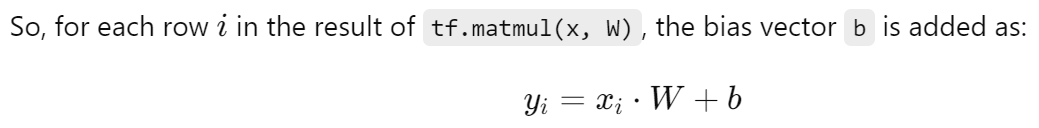

Where

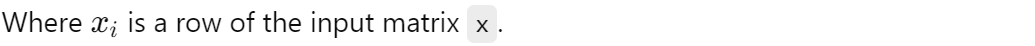

----------------------------------
#6. grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
Here, you're computing the gradients of 𝑦 with respect to both W and b.

This gives you the partial derivatives of 𝑦 with respect to each of the elements in W and b.

##Gradient with respect to W:
The gradient with respect to each element of W is computed based on how changes in W affect the output 𝑦.

This is similar to backpropagation in neural networks.

##Gradient with respect to b:
Since the bias vector is added element-wise, the gradient with respect to each element of b will just be the sum of the gradients of the corresponding elements of the output.

##Output:
The output grad_of_y_wrt_W_and_b will be a list of two gradients:

The gradient of 𝑦 with respect to W (a 2x2 matrix).

The gradient of 𝑦 with respect to b (a 1D vector of length 2).
Here’s an example of what the output might look like:

    [<tf.Tensor: shape=(2, 2), dtype=float32, numpy=array([[...], [...]], dtype=float32)>,
    <tf.Tensor: shape=(2,), dtype=float32, numpy=array([...], dtype=float32)>]

The gradient values depend on the initial values of W, b, and x.

These gradients indicate how each element of W and b would need to change to minimize a loss function in a typical machine learning scenario

# The GradientTape works with tensor operations

In [62]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
 y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

# It also works with lists of variables


In [63]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
 y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

# Using Tensorflow Classes

In [65]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation  # Assign the activation function
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)


# 1. import tensorflow as tf

This line imports the TensorFlow library and gives it the alias tf.

TensorFlow is a powerful library for numerical computation, particularly used for building and training machine learning models.

By using as tf, we can refer to TensorFlow functions and classes using tf. instead of writing out the full tensorflow each time.

This is a common convention to keep code concise.

-----------------------------------
#2. class NaiveDense:

This line defines a new class called NaiveDense.

A class is like a blueprint for creating objects.

This class will represent a simple, densely connected layer in a neural network.

---------------------
#3. def __init__(self, input_size, output_size, activation):

This line defines the constructor (or initializer) of the NaiveDense class.

##The __init__ method

is automatically called when you create a new object (instance) of the class.

It takes three arguments:

###input_size:
The number of input features to the layer.

###output_size:
The number of output neurons in the layer.

###activation:
The activation function to use for this layer (e.g., tf.nn.relu, tf.nn.sigmoid).

-----------------------
#4. self.activation = activation

Inside the __init__ method, this line assigns the activation function passed as an argument to an attribute called self.activation.

self refers to the current instance of the class.

So, this line is essentially saying:
##"For this particular object of the NaiveDense class, store the given activation function in its activation attribute."

This allows the activation function to be used later within the layer's operations.

-----------------------------
#5. w_shape = (input_size, output_size)

This line creates a tuple called w_shape that represents the shape of the weight matrix for the layer.

The weight matrix connects the inputs to the outputs of the layer.

The shape is determined by input_size and output_size, ensuring the weight matrix has the correct dimensions for the connections.

---------------------------
#6. w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)

This line uses TensorFlow's tf.random.uniform function to generate random values for initializing the weight matrix (W).

w_shape is used to determine the shape of the matrix.

minval=0 and maxval=1e-1 specify that the random values should be uniformly distributed between 0 and 0.1.

This is a common practice for initializing weights in neural networks to help with training stability.

##Note:
1 × 10-1 = 1 / 10 = 0.1

Therefore, 1e-1 translates to 0.1

------------------------------------
#In summary

This section of the code sets up the basic structure of a simple dense layer in a neural network. It defines the layer's constructor, initializes the activation function, and generates initial random values for the weight matrix. These are fundamental steps in creating a functional neural network layer.
